**import libraries**

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline  
import seaborn as sns
from pandas.plotting import scatter_matrix                          
from sklearn import linear_model    
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from pandas import DataFrame

**Loading and exploring Data**

In [3]:
df1 = pd.read_csv("miles-driven.csv")
df2 = pd.read_csv("road-accidents.csv")
# take a look at the dataset
df1.head()
df2.head()

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...


**Drop the first ten rows since they are non informative.**

In [4]:
df2 = df2.drop([df2.index[0] , df2.index[1],df2.index[2], df2.index[3], df2.index[4], df2.index[5], df2.index[6],df2.index[7],df2.index[8]])

**Explore Data**

In [5]:
df2.head()

,##### LICENSE #####
9,Alabama|18.8|39|30|80
10,Alaska|18.1|41|25|94
11,Arizona|18.6|35|28|96
12,Arkansas|22.4|18|26|95
13,California|12|35|28|89


**Name of Columns**

In [6]:
print(df2.columns)

Index(['##### LICENSE #####'], dtype='object')


In [7]:
print(df1.columns)

Index(['state|million_miles_annually'], dtype='object')


**Split one column to many Columns by seperator |**

In [8]:
df2=df2['##### LICENSE #####'].str.split('|', expand=True)


In [9]:
df1=df1['state|million_miles_annually'].str.split('|', expand=True)

**Explore again Data**

In [10]:
df1.head()

,0,1
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [11]:
df2.head()

,0,1,2,3,4
9,Alabama,18.8,39,30,80
10,Alaska,18.1,41,25,94
11,Arizona,18.6,35,28,96
12,Arkansas,22.4,18,26,95
13,California,12,35,28,89


**Rename Columns with appropriate names**

In [12]:
df2.columns = ['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time']

In [13]:
df1.columns = ['state', 'million_miles_annually']

**Final  data**

In [14]:
df1.head()  

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [15]:
df2.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
9,Alabama,18.8,39,30,80
10,Alaska,18.1,41,25,94
11,Arizona,18.6,35,28,96
12,Arkansas,22.4,18,26,95
13,California,12,35,28,89


**Combining two dataframes in one datframe based on state as an id.**

In [16]:
df3=pd.merge(df1, df2, how='inner', on = 'state')

In [17]:
df3 = df3.reset_index(drop=True)

**Exploration of Final data**

In [18]:
df3.head()

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12,35,28,89


In [19]:
df3.isnull().any()

state                     False
million_miles_annually    False
drvr_fatl_col_bmiles      False
perc_fatl_speed           False
perc_fatl_alcohol         False
perc_fatl_1st_time        False
dtype: bool

**Create a textual and a graphical summary of the data**

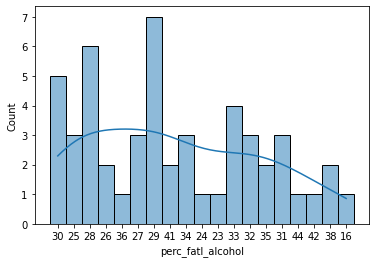

In [20]:
# Histogram 
sns.histplot(data=df3,x="perc_fatl_alcohol", kde=True)

Text(0, 0.5, 'alchol percent')

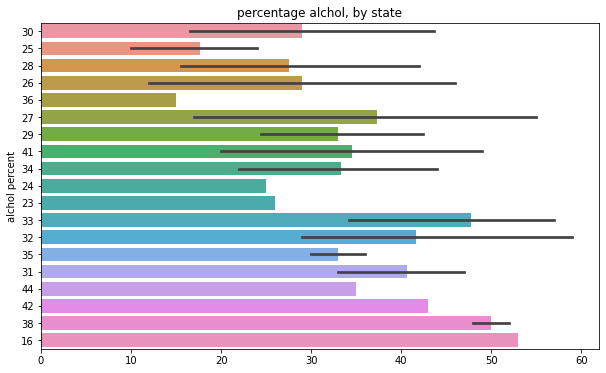

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("percentage alchol, by state")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df2.index, y=df2['perc_fatl_alcohol'])

# Add label for vertical axis
plt.ylabel("alchol percent")

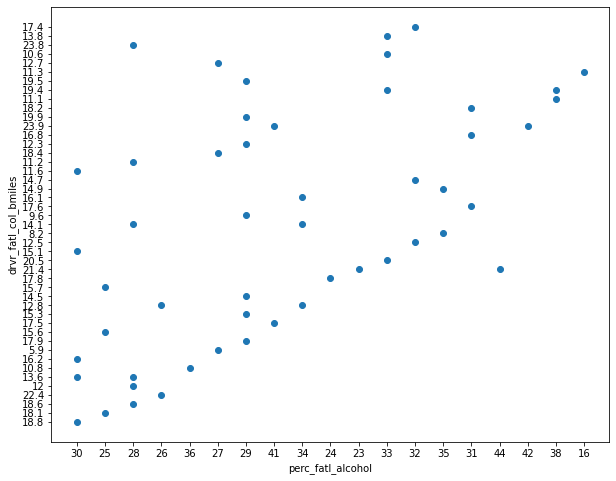

In [29]:
plt.figure(figsize=(10,8))
plt.scatter( df3['perc_fatl_alcohol'],df3['drvr_fatl_col_bmiles'])
plt.xlabel("perc_fatl_alcohol")
plt.ylabel("drvr_fatl_col_bmiles")
plt.show()

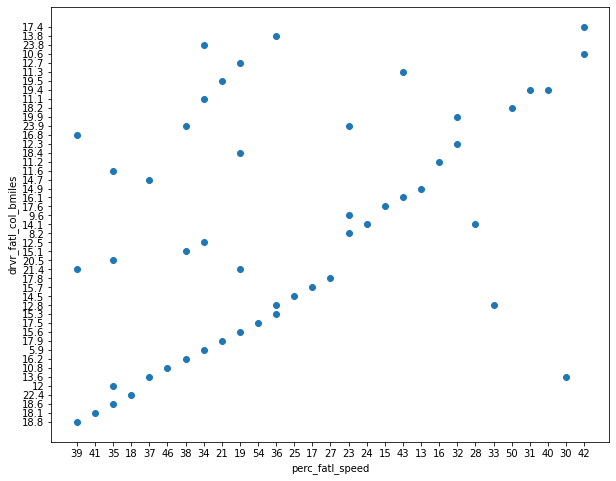

In [30]:
plt.figure(figsize=(10,8))
plt.scatter( df3['perc_fatl_speed'],df3['drvr_fatl_col_bmiles'])
plt.xlabel("perc_fatl_speed")
plt.ylabel("drvr_fatl_col_bmiles")
plt.show()

<Figure size 720x576 with 0 Axes>

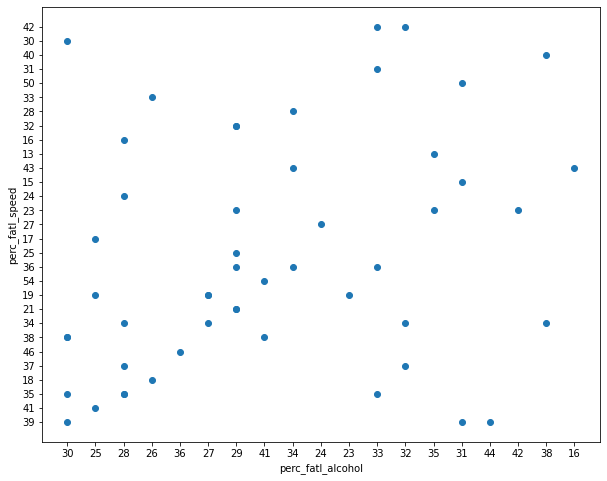

In [32]:
plt.figure(figsize=(10,8))
plt.scatter( df3['perc_fatl_alcohol'],df3['perc_fatl_speed'])
plt.xlabel("perc_fatl_alcohol")
plt.ylabel("perc_fatl_speed")
plt.show()

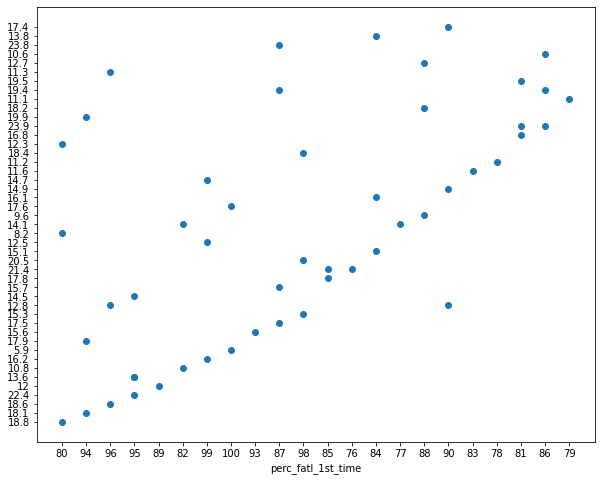

In [33]:
plt.figure(figsize=(10,8))
plt.scatter( df3['perc_fatl_1st_time'],df3['drvr_fatl_col_bmiles'])
plt.xlabel("perc_fatl_1st_time")
plt.ylabel("")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57b17b3490>,
      dtype=object)

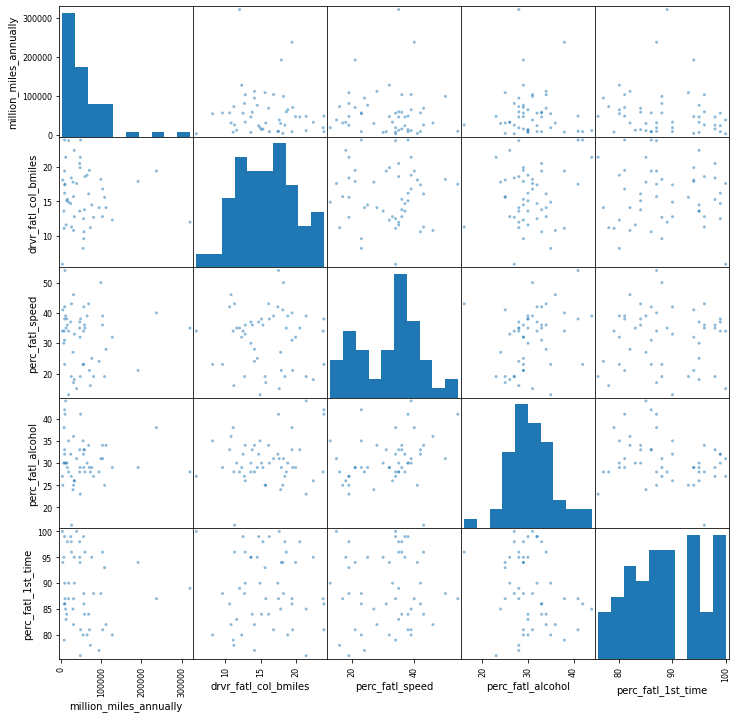

In [34]:
df3=df3.iloc[:, 1:7]
from pandas.plotting import scatter_matrix
df3= df3.astype(float)
pd.plotting.scatter_matrix(df3,figsize=(12,12))

**Quantify the association of features and accidents**

In [35]:
x=df3['perc_fatl_alcohol']
y=df3['perc_fatl_speed']
r0 = np.corrcoef(x, y)
r0[1, 0]

0.286244171481402

**perc_fatl_alcohol** and **perc_fatl_speed** are **positivaly corelated**.

In [36]:
x=df3['perc_fatl_alcohol']
y=df3['drvr_fatl_col_bmiles']
r1 = np.corrcoef(x, y)
r1[1, 0]

0.19942634378011187

**perc_fatl_alcohol** and **drvr_fatl_col_bmiles** are positivaly corelated.



In [37]:
x=df3['perc_fatl_alcohol']
y=df3['perc_fatl_1st_time']
r2= np.corrcoef(x, y)
r2[1, 0]

-0.24545505951209234

In [38]:
x=df3['perc_fatl_speed']
y=df3['drvr_fatl_col_bmiles']
r3 = np.corrcoef(x, y)
r3[1, 0]

-0.029080145913990683

**perc_fatl_speed** and   **drvr_fatl_col_bmiles**  are negativaly correlatd.

So we can notice that we have here the phenomenon of **masking relationship.**

In [39]:
x=df3['perc_fatl_speed']
y=df3['perc_fatl_1st_time']
r4 = np.corrcoef(x, y)
r4[1, 0]

0.014066221138544114

In [40]:
x=df3['million_miles_annually']
y=df3['drvr_fatl_col_bmiles']
r4 = np.corrcoef(x, y)
r4[1, 0]

-0.07713327796255587

**Fit a multivariate linear regression**

In [41]:
x = df3[['drvr_fatl_col_bmiles','perc_fatl_alcohol','perc_fatl_speed','perc_fatl_1st_time']]
y = df3['drvr_fatl_col_bmiles']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.00000000e+00  2.37977621e-17 -3.64241453e-17 -6.16022994e-17]


Comparing the regression coefficients with the correlation coefficients, we can clearly notice that they are slightly different due to the fact that  that multiple regression computes the association of a feature with an outcome, given the association with all other features, which is not accounted for when calculating the correlation coefficients.

**Perform PCA on standardized data**

**Scaling Data**

StandardScaler() is the appropriate scaling function  to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

In [42]:
features = ["perc_fatl_alcohol", "perc_fatl_speed", "perc_fatl_1st_time"]

X = df3.copy()
y = X.pop('drvr_fatl_col_bmiles')
X = X.loc[:, features]
X= X.astype(float)
# Standardize
#X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled
X = DataFrame(X_scaled)
X.columns = ['perc_fatl_alcohol', 'perc_fatl_speed', 'perc_fatl_1st_time']
X.head()

,perc_fatl_alcohol,perc_fatl_speed,perc_fatl_1st_time
0,-0.135050,0.762645,-1.266117
1,-1.118982,0.972321,0.765361
2,-0.528623,0.343293,1.055572
3,-0.922196,-1.438953,0.910466
4,-0.528623,0.343293,0.039833


In [43]:
X.describe()

,perc_fatl_alcohol,perc_fatl_speed,perc_fatl_1st_time
count,5.100000e+01,5.100000e+01,5.100000e+01
mean,-2.340176e-16,-9.143013e-17,8.838246e-16
std,1.009950e+00,1.009950e+00,1.009950e+00
min,-2.890061e+00,-1.963143e+00,-1.846539e+00
25%,-5.286227e-01,-9.147630e-01,-7.582475e-01
50%,-1.350496e-01,2.384551e-01,-1.052726e-01
75%,4.553101e-01,6.578071e-01,9.104661e-01
max,2.619962e+00,2.335215e+00,1.635994e+00


Now we can fit scikit-learn's PCA estimator and create the principal components. **You can see here the first few rows of the transformed dataset.**

In [44]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3
0,0.884639,0.464211,1.097652
1,-0.625299,-1.220247,0.950424
2,-0.671696,-1.027863,0.062021
3,-1.839546,0.239910,-0.555421
4,-0.211743,-0.256667,0.536811


Now, we will show the **loading** of each component.

In [45]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
perc_fatl_alcohol,0.713581,0.005705,-0.700550
perc_fatl_speed,0.534557,-0.650778,0.539200
perc_fatl_1st_time,-0.452826,-0.759246,-0.467433


**PC1** describes a contrast between accidents with a high alcohol & high 
speed but low first-time accidents and the opposite: small alcohol & speed with low first-time accidents.

 in **PC2** The feature perc_fatl_alcohol have near-zero loadings, so let's ignore it. This component is mostly about perc_fatl_speed and perc_fatl_1st_time. these two features that have the same sign (negative), indicating that this component is describing a contrast between accident having large values and accident having small values for these features.

**PC3** describes a contrast between accidents with a high speed but low first-time accidents and alcohol consumption and the opposite: small speed with high first-time accidents and high alcohol consumption.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs



def score_dataset(X, y, model=XGBRegressor()):
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

**Visualize the first two principal components**

From the cumulative variance insight we can remark  The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents.

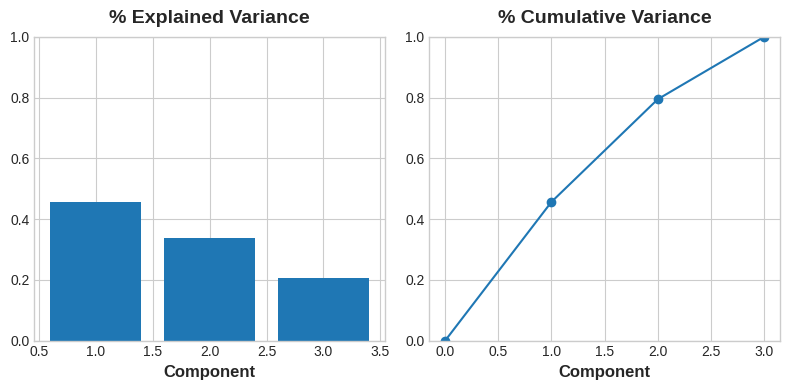

In [48]:
plot_variance(pca);

In [49]:
print("Correlation with  the number of fatal accidents :\n")
print(df3[features].corrwith(df3.drvr_fatl_col_bmiles))

Correlation with  the number of fatal accidents :

perc_fatl_alcohol     0.199426
perc_fatl_speed      -0.029080
perc_fatl_1st_time   -0.017942
dtype: float64


**Find clusters of similar states in the data**

we will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.

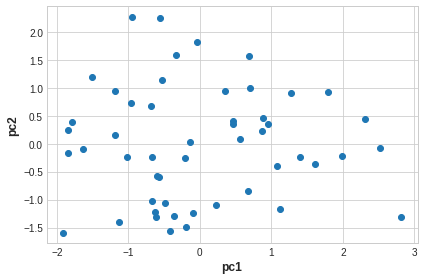

In [50]:
X = X.join(X_pca)
plt.scatter( X['PC1'], X['PC2'])
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

It's not entirely clear from the PCA scatter plot how many groups in which the states cluster.  So we will use KMeans clustering by identifying a reasonable number of clusters

**KMeans to visualize clusters in the PCA scatter plot**


In [51]:
features = ["PC1", "PC2"]
X = X.loc[:, features]
X.head()

,PC1,PC2
0,0.884639,0.464211
1,-0.625299,-1.220247
2,-0.671696,-1.027863
3,-1.839546,0.239910
4,-0.211743,-0.256667


Since there wasn't a clear elbow in the scree plot, assigning the states to either two or three clusters is a reasonable choice, and we will resume our analysis using three clusters.

In [52]:
kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,PC1,PC2,Cluster
0,0.884639,0.464211,2
1,-0.625299,-1.220247,1
2,-0.671696,-1.027863,1
3,-1.839546,0.239910,1
4,-0.211743,-0.256667,1


Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.

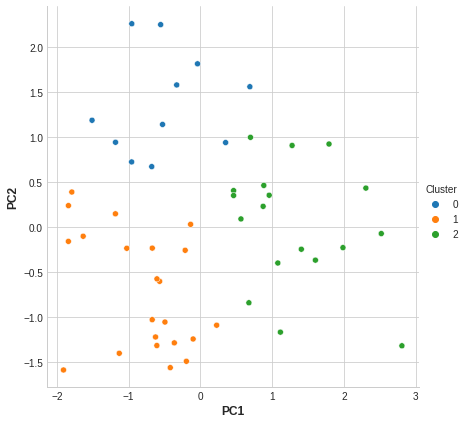

In [53]:
sns.relplot(
    x="PC1", y="PC2", hue="Cluster", data=X, height=6,
);

**Visualize the feature differences between the clusters**

the first group reprents accidents with small pc1 and pc2.
the second group represents accidents with small PC1 but large PC2.
the third group represents accidents with large PC1 and large PC2.
as we have seen previously that PC1 is large when speed and alcohol are high and first-time is low. and PC2 is large when speed and first time is both low.

So , the first group is when first time is high and alcohol consumption is low.
the second group is when alcohol consumption and speed is low and first time is high. 
the third group is when first time is low and alcohol consumption  is high.

**Compute the number of accidents within each cluster**

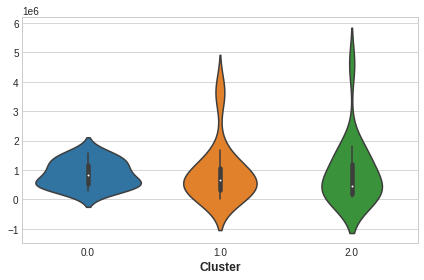

In [54]:
X["million_miles_annually"] = df3["million_miles_annually"]
X["drvr_fatl_col_bmiles"] = df3["drvr_fatl_col_bmiles"]
X= X.astype(float)
ax = sns.violinplot(x="Cluster", y=X["million_miles_annually"]*X["drvr_fatl_col_bmiles"], data=X)

**Make a decision when there is no clear right choice**

the cluster that i  think should be a focus for policy intervention and further investigation is cluster 2 since it gives a high total fatal traffic accidents. So , we have to think about how to reduce alcohol consumption and check for those people that makes many accidents and apply a new policy on driving license.